In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sko.GA import GA
from sklearn.svm import SVR
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
yuanyou = pd.read_excel("数据/原油数据.xlsx")
yuanyou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   日期          69 non-null     int64  
 1   美元指数        69 non-null     float64
 2   MSCI全球指数    69 non-null     float64
 3   标准普尔500指数   69 non-null     float64
 4   原油产量        69 non-null     int64  
 5   总交易量        69 non-null     float64
 6   Brent原油交易量  69 non-null     object 
 7   WHI原油交易量    69 non-null     object 
 8   Brent原油价格   69 non-null     float64
 9   WHI原油价格     69 non-null     float64
 10  平均价格        69 non-null     float64
 11  地缘政治风险指数    69 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 6.6+ KB


In [5]:
x = yuanyou.iloc[17:, 1:6][::-1]
y = yuanyou.iloc[17:, 10][::-1]


In [6]:
svm_poly_reg = SVR(kernel="poly", degree=6, C=100, epsilon=0.01)
svm_poly_reg.fit(x, y)
svm_poly_reg.score(x,y)

-0.02396729386990981

samples: 52 	 features: 5
----------------------------------------------------------------------
cross validation result:
                          0         1         2         3         4         5
BayesianRidge     -4.168146 -3.477324 -1.933814 -0.144626 -0.186485 -1.515456
LinearRegression -14.883801 -0.029894 -2.699837 -0.001655 -1.321067 -2.349307
ElasticNet        -7.138905 -1.093386 -3.026018 -0.081668 -1.353288 -2.158173
SVR              -17.334574 -6.625964 -0.968504 -0.274068 -1.260151 -2.821476
GBR               -5.542251 -1.234395 -2.106747  0.038798 -0.543321 -1.110307
----------------------------------------------------------------------
regression metrics:
                        ev       mae        mse        r2
BayesianRidge     0.442946  4.518136  32.935324  0.442946
LinearRegression  0.500033  4.329850  29.560093  0.500033
ElasticNet        0.487968  4.442292  30.273433  0.487968
SVR              -0.001715  6.176859  59.733432 -0.010307
GBR               0.999363  0

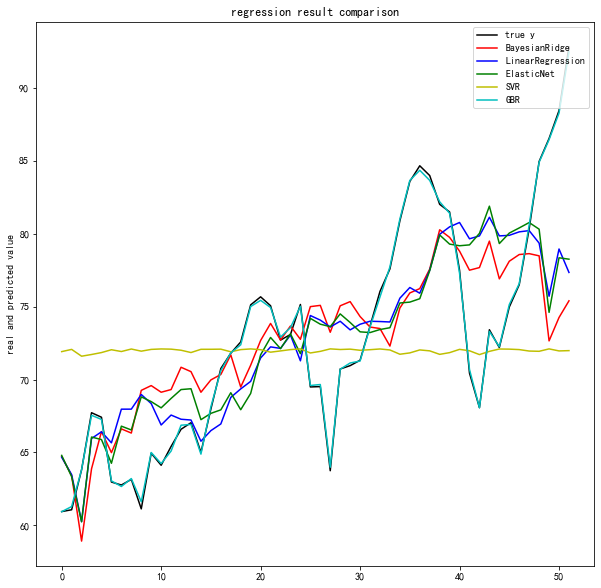

regression prediction
[92.45640881 81.48302869 78.57105146 78.80073846 78.42584274 75.74480011
 79.33123578 78.5678008  79.73585743 79.52794719 77.64429806 77.04855671
 75.24515249 75.25414858 75.1450471  75.29701378 75.8034164  75.24515249]


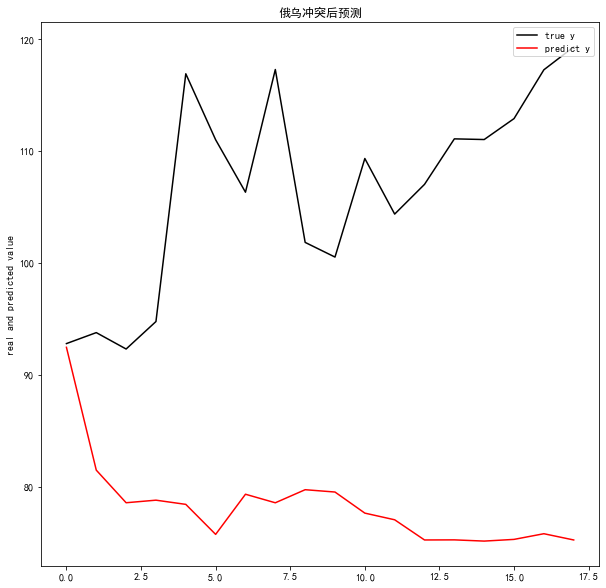

In [7]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
# 数据准备
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression',
               'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc,
             model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, x, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(x, y).predict(x))  # 将回归训练中得到的预测y存入列表
# 模型效果指标评估
n_samples, n_features = x.shape  # 总样本量,总特征数
# explained_variance_score:解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量
# 的方差变化，值越小则说明效果越差。
# mean_absolute_error:平均绝对误差（Mean Absolute Error，MAE），用于评估预测结果和真实数据集的接近程度的程度
# ，其其值越小说明拟合效果越好。
# mean_squared_error:均方差（Mean squared error，MSE），该指标计算的是拟合数据和原始数据对应样本点的误差的
# 平方和的均值，其值越小说明拟合效果越好。
# r2_score:判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因
# 变量的方差变化，值越小则说明效果越差。
model_metrics_name = [explained_variance_score,
                      mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=[
                   'ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print(70 * '-')  # 打印分隔线
print('cross validation result:')  # 打印输出标题
print(df1)  # 打印输出交叉检验的数据框
print(70 * '-')  # 打印分隔线
print('regression metrics:')  # 打印输出标题
print(df2)  # 打印输出回归指标的数据框
print(70 * '-')  # 打印分隔线
print('short name \t full name')  # 打印输出缩写和全名标题
print('ev \t explained_variance')
print('mae \t mean_absolute_error')
print('mse \t mean_squared_error')
print('r2 \t r2')
print(70 * '-')  # 打印分隔线
# 模型效果可视化
plt.figure(figsize=[10, 10])  # 创建画布
plt.plot(np.arange(x.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(x.shape[0]), pre_y_list[i],
             color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.savefig("拟合图.jpg")
plt.show()  # 展示图像
# 模型应用
print('regression prediction')
new_point_set = yuanyou.iloc[0:18, 1:6][::-1]  # 要预测的新数据集
newy = yuanyou.iloc[0:18, 10][::-1]
new_pre_y = model_gbr.predict(new_point_set)  # 使用GBR进行预测
print(new_pre_y)  # 打印输出每个数据点的预测信息
plt.figure(figsize=[10, 10])  # 创建画布
plt.plot(np.arange(new_point_set.shape[0]),
         newy, color='k', label='true y')
plt.plot(np.arange(new_point_set.shape[0]),
         new_pre_y, color='r', label='predict y')
plt.title('俄乌冲突后预测')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

510.03391173849576


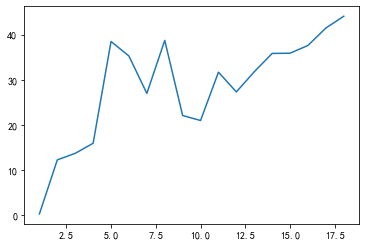

In [14]:
diff=newy-new_pre_y
print(sum(diff[1:]))
t=np.linspace(1,18,18)
plt.plot(t,diff)
plt.savefig("实际值与预测值差值变化.jpg")